In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import keras
import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix

# Paramètres
batch_size = 128
epochs = 10
# Vocabulary
# One epoch is when an ENTIRE dataset is passed forward and backward through neural network only once
# Batch_size : total number of training examples present in a single batch. 
# Batch_size : defines the number of samples to work through before updating the internal model parameters
# Batch_size : is the number of samples processed before the model is updated. 



import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9212058916620187378
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10735602893
locality {
  bus_id: 1
  links {
  }
}
incarnation: 103686371391819933
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1"
]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
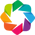

In [2]:
import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt
import pywt
import scipy.io as sio
import pandas as pd
import holoviews as hv
import param
import panel as pn
from panel.pane import LaTeX
import itertools
pn.extension()
hv.extension('bokeh')

### Lecture des données d'apprentissage et de test

In [2]:
# Lecture des données d'apprentissage
N_classes = 10

# path="" # Si les données sont dans le répertoire courant sinon:
path=""
Dtrain=pd.read_csv(path+"mnist_train.zip",header=None)

X_train = Dtrain.values[:,:-1] # Reprend tout le tableau sauf la dernière colonne 
Y_train = Dtrain.values[:,-1] # Récupère la dernière colonne du tabelau qui correspond à ? 

Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
X_test = Dtest.values[:,:-1]
Y_test = Dtest.values[:,-1] # label

In [3]:
Y_train_cat = ku.to_categorical(Y_train, N_classes) # convert a class vector to binary class matrix
Y_test_cat = ku.to_categorical(Y_test, N_classes) # Nombre de colonne correspond au nombre de classe
# le nombre de lignes de la matrice correspond au nombre d'éléments du vecteur original. 
# Chaque ligne corespond à un élément du vecteur initial si cet élément appartient à la j-ème classe
# ie la j-ème colonne on met 1 le reste sera par des 0.

In [4]:
X_train_conv = X_train.reshape(60000, 28, 28, 1)
X_test_conv = X_test.reshape(10000, 28, 28, 1)

### Etude des sorties de chaque couche 

#### Modèle sans décomposition des couches 

In [6]:

# descrition du réseau
model = km.Sequential()
model.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last"))
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(N_classes, activation='softmax'))



# Résumé
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
# Apprentissage
model.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


'model.compile(loss="categorical_crossentropy",\n              optimizer=ko.Adadelta(),\n              metrics=[\'accuracy\'])\n\nmodel.fit(X_train_conv, Y_train_cat,\n          batch_size=batch_size,\n          epochs=epochs,\n          verbose=1,\n          validation_data=(X_test_conv, Y_test_cat))\n'

In [9]:
model_imgs = model.predict(X_test_conv)

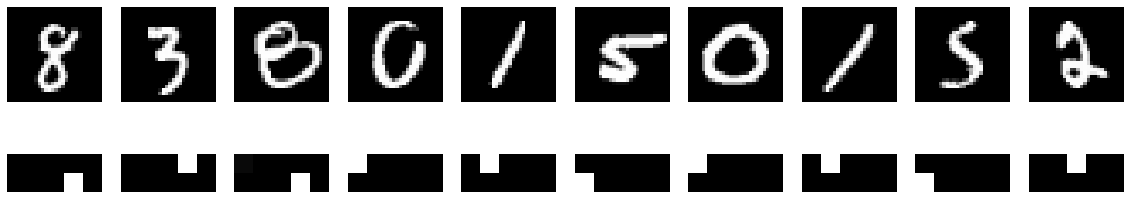

In [10]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i +1 )
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(model_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## II. Modèle avec décomposition des couches  

In [5]:

Conv2D_1 = km.Sequential(name="conv2D1")
Conv2D_1.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last",name = "conv2D1"))

Conv2D_2 = km.Sequential(name="conv2D2")
Conv2D_2.add(kl.Conv2D(64, (3, 3), activation='relu',name ="conv2D2"))

Maxpool = km.Sequential(name="Maxpool")
Maxpool.add(kl.MaxPooling2D(pool_size=(2, 2), name ="Maxpool"))
Maxpool.add(kl.Dropout(0.25))
Maxpool.add(kl.Flatten())

Dense1 = km.Sequential(name = "dense1")
Dense1.add(kl.Dense(128, activation='relu',name ="dense1"))
Dense1.add(kl.Dropout(0.5))


Dense2 = km.Sequential(name ="dense2")
Dense2.add(kl.Dense(N_classes, activation='softmax',name ="dense2"))


modeldecomp = km.Sequential(name="modèle décomposé")
modeldecomp.add(Conv2D_1)
modeldecomp.add(Conv2D_2)
modeldecomp.add(Maxpool)
modeldecomp.add(Dense1)
modeldecomp.add(Dense2)
modeldecomp.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2D1 (Sequential)         (None, 26, 26, 32)        320       
_________________________________________________________________
conv2D2 (Sequential)         (None, 24, 24, 64)        18496     
_________________________________________________________________
Maxpool (Sequential)         (None, 9216)              0         
_________________________________________________________________
dense1 (Sequential)          (None, 128)               1179776   
_________________________________________________________________
dense2 (Sequential)          (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [6]:
modeldecomp.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

modeldecomp.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 1.3486 - acc: 0.8549 - val_loss: 0.1016 - val_acc: 0.9722
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1170 - acc: 0.9663 - val_loss: 0.0464 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0837 - acc: 0.9754 - val_loss: 0.0442 - val_acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0646 - acc: 0.9807 - val_loss: 0.0392 - val_acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0542 - acc: 0.9839 - val_loss: 0.0328 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0470 - acc: 0.9863 - val_loss: 0.0374 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0439 - acc: 0.9874 - val_loss: 0.0442 - val_ac

In [7]:
modeldecomp_imgs = modeldecomp.predict(X_test_conv)
Conv2D_1_imgs =Conv2D_1.predict(X_test_conv)
Conv2D_2_imgs =Conv2D_2.predict(Conv2D_1_imgs)
Maxpool_imgs =Maxpool.predict(Conv2D_2_imgs)
Dense1_imgs =Dense1.predict(Maxpool_imgs)
Dense2_imgs =Dense2.predict(Dense1_imgs)


#### Matrice de confusion

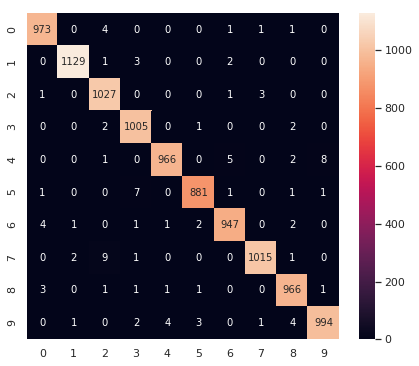

In [9]:

predict_mpl = modeldecomp.predict(X_test_conv)
fig=plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax = sb.heatmap(pd.DataFrame(confusion_matrix(Y_test, predict_mpl.argmax(1))), annot=True, fmt="d")


### 1. Filtres actifs


In [8]:
import numpy.linalg as npl

def selection_4(img) : 
    shape = np.shape(img)[2]
    m = 0
    vect_norm = np.zeros(shape)
    filtre_actif = []
    for i in range(shape) : 
        vect_norm[i] = npl.norm(img[:,:,i])
        m = m + vect_norm[i]
    m = m/shape
    for i in range(shape) :
        if vect_norm[i]>m : 
            filtre_actif += [i]
    filtre_actif = np.array(filtre_actif)
    return filtre_actif

# Description de l'algo : Prend en argument la sortie de la couche pour une seule image et en étudie la réponse de l'image aux différents filtres 
# la boucle parcourt tout les filtres pour calculer une moyenne de norme des filtres pour l'image correspondante 
# filtre actif nous retourne les indices des filtres ayant une norme supérieure à la moyenne des normes des filtres.         

In [9]:
def Affichage_select_4 (imgs,l) : 
    # n represente le nombre d'image que l'on décide de traiter
    # imgs reprensente les sorties intermédiaires d'une couche
    l = np.array(l) # l étant un vecteur contenant l'indice des images que l'on veut afficher et dont on veut afficher les filtres actifs.
    n = len(l)
    #ind = 0
    for i in (l):
        print("---------- number ", i ,"-----------")
        fig = plt.figure(figsize=(20, 4))
        index_active_filter = selection_4(imgs[i,:,:,:])
        m = len(index_active_filter)
        #k = ind*m +1
        for k,j in enumerate(index_active_filter) :
            ax = fig.add_subplot(1,m,k+1) # Paramètres d'affichage ne sont pas bons
            ax.imshow(imgs[i,:,:,j])
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_title("%d"%j)
        #fig.suptitle("---------- number " + str(i+1) +"-----------")
        plt.show()
       
        #ind += 1

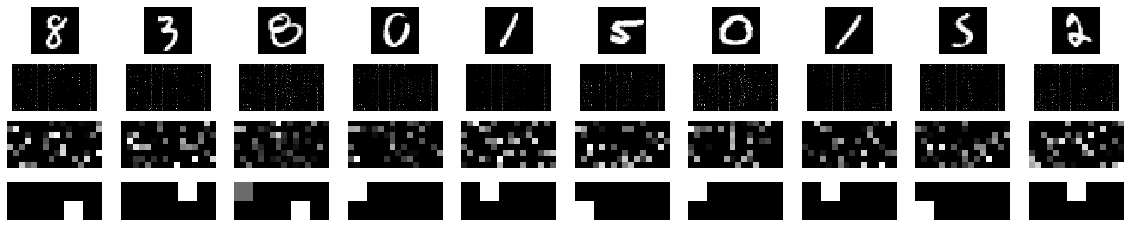

In [10]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(Maxpool_imgs[i].reshape(72, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    # display output first layer Dense
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(Dense1_imgs[i].reshape(8, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output last layer Dense
    ax = plt.subplot(4, n, i + 1 + 3*n )
    plt.imshow(Dense2_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

### Distribution de la norme des images-réponses aux filtres

In [11]:
def Segregation_label_pd(data,label):
    data_isolated = []
    index_isolated = []
    for i in range (np.shape(data.values)[0]):
        if (data.values[i,-1]==label):
            data_isolated+= [data.values[i,:-1]]
            index_isolated += [i]
    data_isolated = np.array(data_isolated)
    index_isolated = np.array(index_isolated)
    return data_isolated,index_isolated

def distribution(img,d,l,f):
    m = np.shape(img)[3] #le nombre de filtre
    ind = Segregation_label_pd(d,l)[1]
    img_l = img[ind,:,:,:]
    n = len(ind)
    vect_fil = np.zeros(n)
    for i in range(n):
        vect_fil[i] = npl.norm(img_l[i,:,:,f])
    return vect_fil,np.mean(vect_fil)
# Algorithme "dsitribution" permet de calculer la norme de toutes les images réponses à un filtre donné pour un label donné.
# Il nous retourne un vecteur contenant la norme de la réponse au filtre f de toutes les images de label "l"

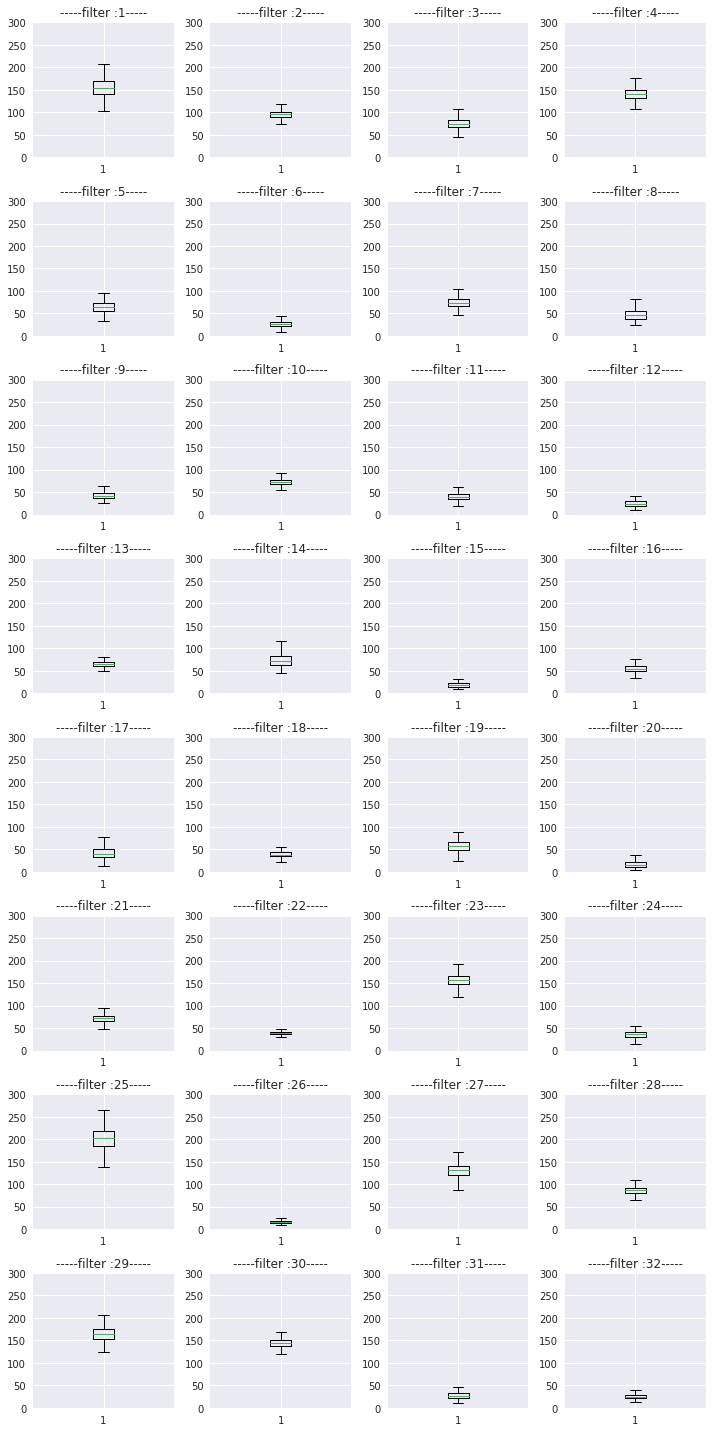

In [13]:
d = Dtest    
img = Conv2D_1_imgs  
nb_neurone = 32

from matplotlib.pyplot import *
list_label =[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10, 20))
for f in range(0,nb_neurone) :
    ax = plt.subplot(8, 4, f + 1)
    vect = distribution(img,d, 7,f)[0] 
    ax.boxplot(vect)
    ax.set_title("-----filter :"+str(f+1)+"-----")
    ax.set_ylim(0,300)
plt.tight_layout()
plt.show()

In [17]:


Sorties= {"Conv2D_1" : Conv2D_1_imgs,"Conv2D_2" : Conv2D_2_imgs}
class Boxplot_filter(param.Parameterized):
    #layer = param.ObjectSelector(default = "Conv2D_1",objects=Sorties)
    label = param.Integer(1,bounds=(0,9))
    filter_numb = param.Integer(1,bounds=(0,31))
    def view(self): 
        #img  = Sorties[self.layer]
        v,m = distribution( Conv2D_1_imgs,Dtest, self.label,self.filter_numb)
        mean ="%2.2f" % m
        te1='Moyenne norme'
        TN=pn.Column(LaTeX(te1,size=15,dpi=100)\
                     ,LaTeX(mean,size=15,dpi=100))
        return pn.Row(hv.BoxWhisker(v),TN)
        
       

Ce dashboard permet de visualiser la distribution de la norme des images-réponses à un filtre donné pour un certain label.

In [18]:
bx_f = Boxplot_filter()
pn.Row(bx_f.param,bx_f.view)

Row
    [0] WidgetBox(name='Boxplot_filter01317', width=300)
        [0] StaticText(value='<b>Boxplot_filter</b>')
        [1] IntSlider(end=31, name='Filter numb', value=1)
        [2] IntSlider(end=9, name='Label', value=1)
    [1] ParamMethod(method)

In [14]:
def distribution_all(img,l,f):
    m = np.shape(img)[3] #le nombre de filtre
    n = np.shape(d)[0]
    vect_fil = np.zeros(n)
    for i in range(n):
        vect_fil[i] = npl.norm(img[i,:,:,f])
    return vect_fil,np.mean(vect_fil)
# Cet algorithme permet d'obtenir les normes de toutes les images réponses à un filtre donné "f"

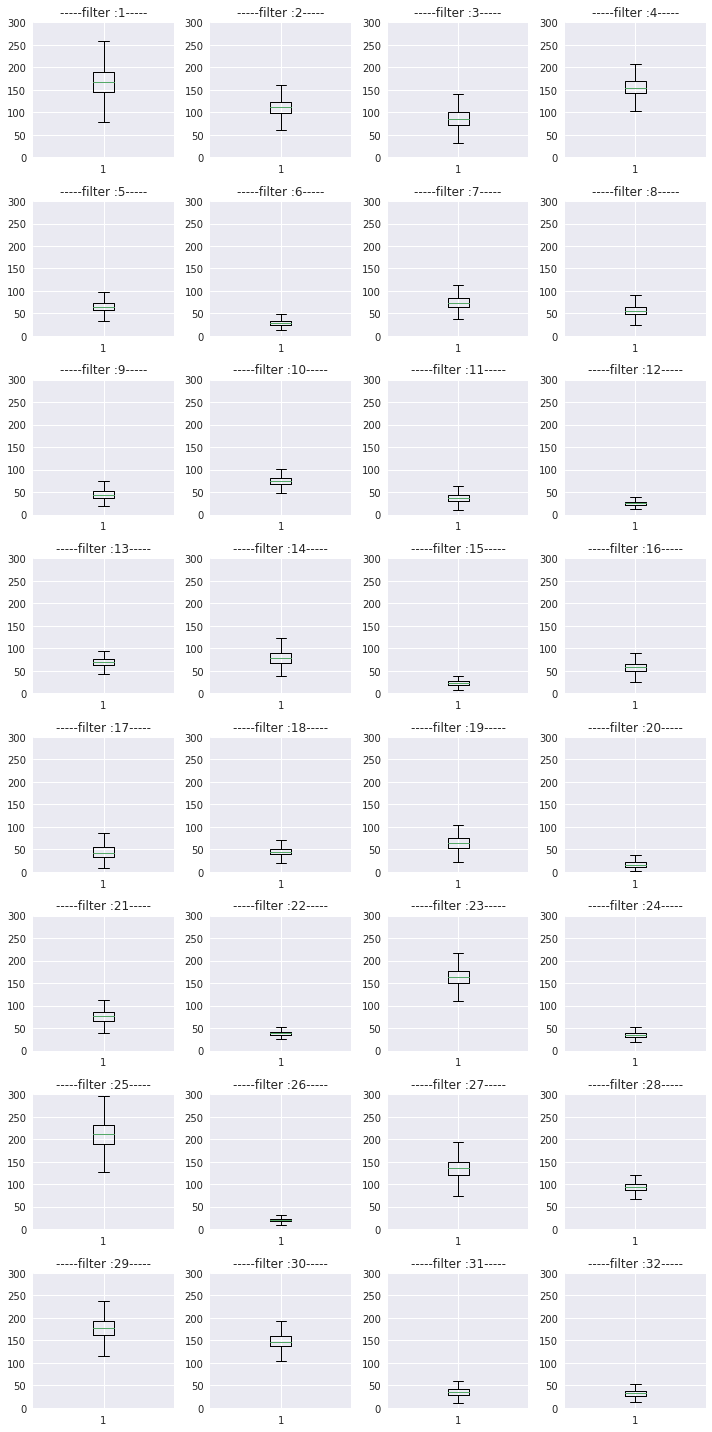

In [16]:
d = Dtest    
img = Conv2D_1_imgs  
nb_neurone = 32


from matplotlib.pyplot import *
list_label =[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10, 20))
for f in range(0,nb_neurone) :
    ax = plt.subplot(8, 4, f + 1)
    vect = distribution_all(img, 7,f)[0] 
    ax.boxplot(vect)
    ax.set_title("-----filter :"+str(f+1)+"-----")
    ax.set_ylim(0,300)
plt.tight_layout()
plt.show()

In [24]:
class Boxplot_filter(param.Parameterized):
    #layer = param.ObjectSelector(default = "Conv2D_1",objects=Sorties)
    filter_numb = param.Integer(1,bounds=(0,31))
    def view(self): 
        #img  = Sorties[self.layer]
        v,m = distribution_all( Conv2D_1_imgs,Dtest,self.filter_numb)
        mean ="%2.2f" % m
        te1='Moyenne norme'
        TN=pn.Column(LaTeX(te1,size=15,dpi=100)\
                     ,LaTeX(mean,size=15,dpi=100))
        return pn.Row(hv.BoxWhisker(v),TN)
        #curveB=hv.Curve(vect_filt[:,self.filter_numb],kdims='x',vdims='v').opts(color='c')
        #return pn.Row(CurveB)

Il s'agit d'un dashboard permettant de visualiser la distribution des normes des images réponses à un filtre donné, à droite on peut aussi observer la moyenne des normes pour le filtre choisi.

In [25]:
bx_f = Boxplot_filter()
pn.Row(bx_f.param,bx_f.view)

Row
    [0] WidgetBox(name='Boxplot_filter01575', width=300)
        [0] StaticText(value='<b>Boxplot_filter</b>')
        [1] IntSlider(end=31, name='Filter numb', value=1)
    [1] ParamMethod(method)

### 2. Comportement des filtres pour différentes écritures 

#### i. Isolement des données : 

In [17]:
def Segregation_label_pd(data, label):
    data_isolated = []
    index_isolated = []
    for i in range (np.shape(data.values)[0]):
        if (data.values[i,-1]==label):
            data_isolated+= [data.values[i,:-1]]
            index_isolated += [i]
    data_isolated = np.array(data_isolated)
    index_isolated = np.array(index_isolated)
    return data_isolated,index_isolated
# Description de l'algorithme : Prend en argument l'ensemble des données sur lesquelles on travaille, et le label dont on cherche à isoler les images. 
# nous retourne les données isolées, ainsi que leur indices dans l'ensemble des données.

In [18]:
def index_active_label_set (data,label,imgs,nb_image=None) : 
    index_label = Segregation_label_pd(data, label)[1]
    # Nous retourne les indices des images de label ="label".
    if nb_image == None :
        nb_image = len(index_label)
    
    A=[]  
    for i in index_label[:nb_image]:
        index_active_filter = selection_4(imgs[i,:,:,:])
        A.extend(index_active_filter)
    return A
# Description de l'algorithme : # cette fonction nous rend en sortie l'indice de l'ensemble des 
                                # filtres activés sur les données ayant le label "label" passé en paramètre. 

In [19]:
import collections

def conversion(A) : # cette fonction prend en parametre l'indice de l'ensemble des filtres actifs pour un label donné, et renvoie
                    # en sortie deux tableaux, filtre étant l'indice du filtre  
                    # et apparition représentant le nombre de fois que le filtre a été activé pour les différentes images.
                    # cette fonction va nous aider à ploter l histogramme
    x = collections.Counter(A)
    # on passe par un dictionnaire pour effectuer la conversion
    filtre = []
    apparition = []
    for key, value in x.items():
        filtre += [key]
        apparition += [value]
    filtre = np.array(filtre)
    apparition = np.array(apparition)
    return filtre,apparition


#### ii.  Couche Conv2D_1

In [29]:
data = Dtest
label = 0
imgs = Conv2D_1_imgs
N_classes = 10

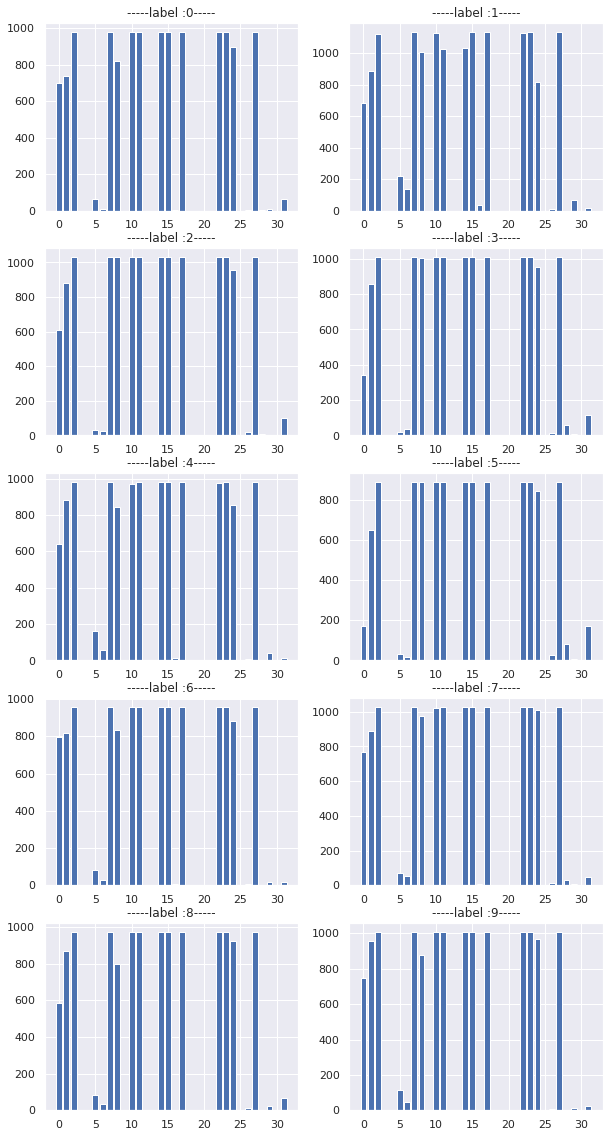

In [30]:
plt.figure(figsize=(10, 20))
for label in range(0,N_classes) :
    ax = plt.subplot(5, 2, label + 1)
    #print("label : %d"%label)
    A = index_active_label_set (data,label,imgs)
    x = collections.Counter(A)
    filtre,apparition = conversion(x)
    plt.bar(filtre,apparition)
    plt.title("-----label :"+str(label)+"-----")
plt.show()

#### Resultat :

Sur cette premiere couche, on arrive pas vraiment à isoler des filtres très spetialisés dans la reconnaissance d'une classe donnée.

#### Interpretation :

On remarque que pour l'ensemble des labels certains filtres ne semblent pas être activés, par exemple sur ce réseau, on voit que les filtres 1 à 4 ne sont jamais activés. on peut conclure qu'un tres grands nombres de neurones n'est pas necessairement obligatoire pour obtenir un resultat satisfaisant. 
On pourra définir un seuil pour chaque classe, ce qui nous permettra, si le seuil est elevé par exemple, de ne retenir que les filtres spécilisés dans la reconnaissance de cette classe.

Dans la partie suivante on essayera d'analyser les résultats des filtres de la couche suivante.

#### iii.  Couche Conv2D_2

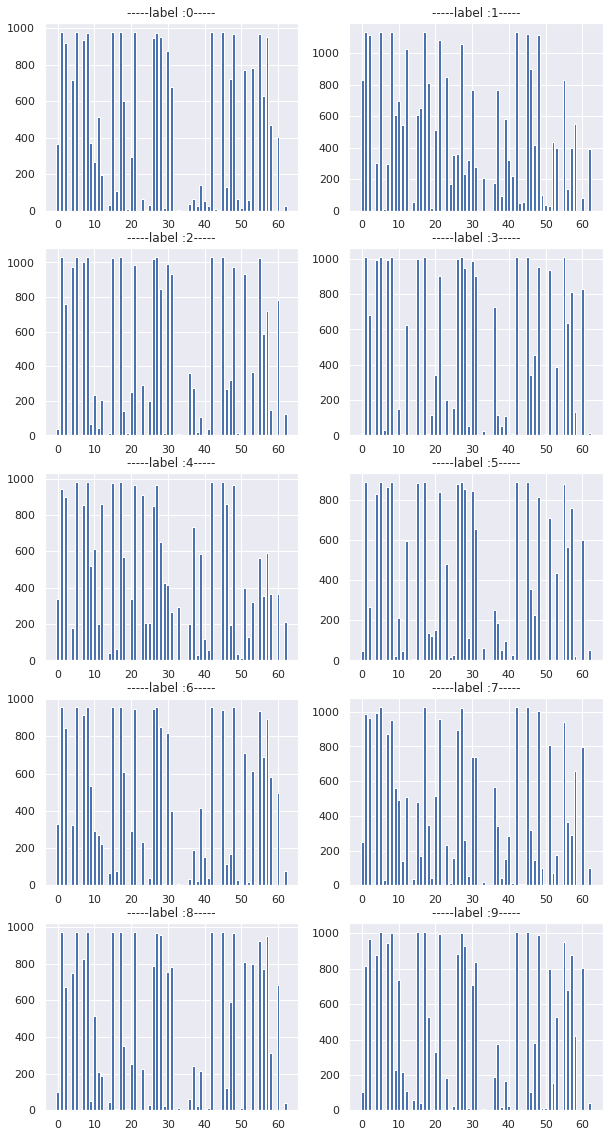

In [31]:
data = Dtest
imgs = Conv2D_2_imgs

plt.figure(figsize=(10, 20))
for label in range(0,N_classes) :
    ax = plt.subplot(5, 2, label + 1)
    A = index_active_label_set (data,label,imgs)
    x = collections.Counter(A)
    filtre,apparition = conversion(x)
    plt.bar(filtre,apparition)
    plt.title("-----label :"+str(label)+"-----")
plt.show()

### 3. Affichage nombre d'appartition des filtres pour chacun des labels 

#### i. Couche Conv2D_1

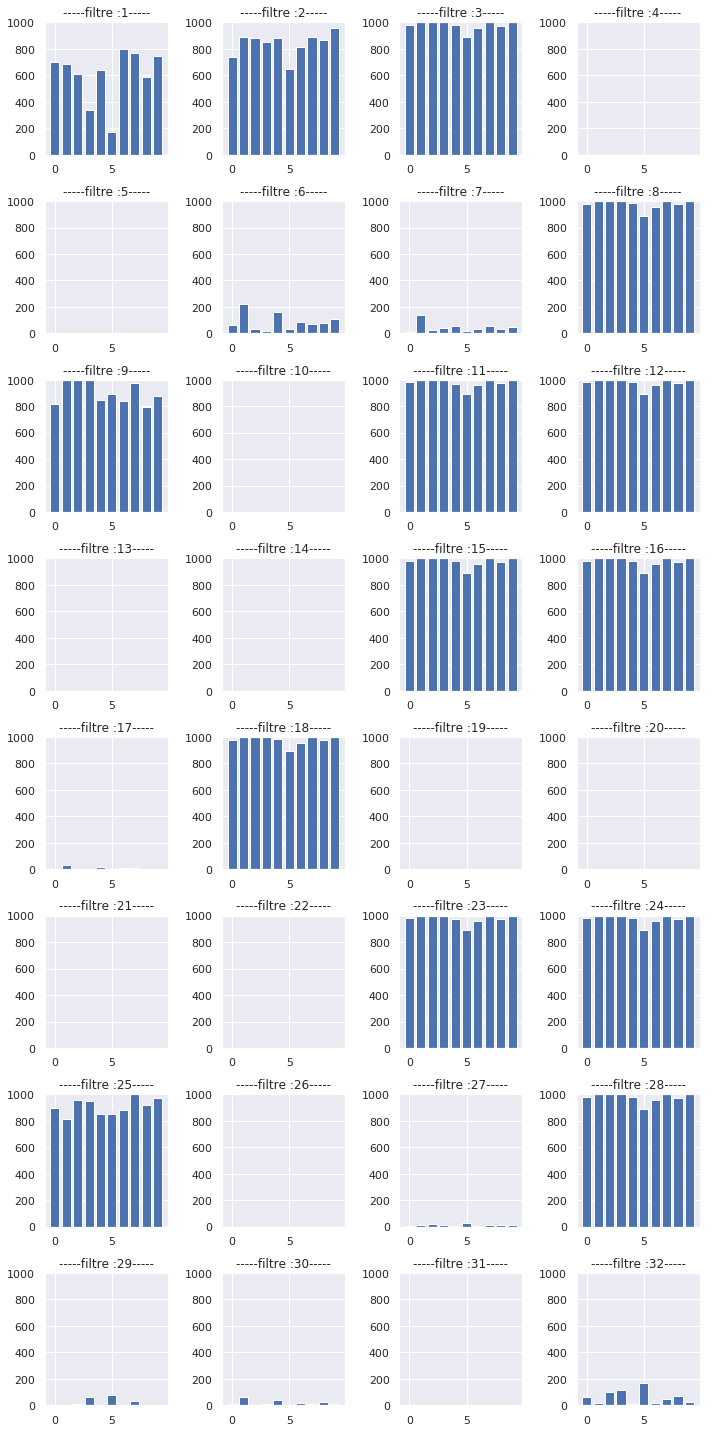

In [32]:
data = Dtest
imgs = Conv2D_1_imgs
nb_neurone = 32
toto = np.zeros((nb_neurone,10))
for label in range(0,10) :
    A = index_active_label_set (data,label,imgs) # ici on récupère l'indice des filtre actif pour les images de label i
    x = collections.Counter(A)
    filtre,apparition = conversion(x) # nous donne pour chaque filtre le nombre de fois qu'il a été activé. 
    for k,i in enumerate (filtre) :   # à travers cette boucle on crée un tableau ou l'on met en ligne les indices des différents filtre 
        toto[i,label]= apparition[k]  # en colonne les différents labels, un élément x_ij du tableau réprésente alors le nombre de fois 
                                      # que le filtre i a été activé  pour le label j.                         

list_label =[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10, 20))
for f in range(0,nb_neurone) :
    ax = plt.subplot(8, 4, f + 1)
    ax.bar(list_label,toto[f,:])
    ax.set_title("-----filtre :"+str(f+1)+"-----")
    ax.set_ylim(0,1000)
plt.tight_layout()
plt.show()

#### ii.Couche Conv2D_2

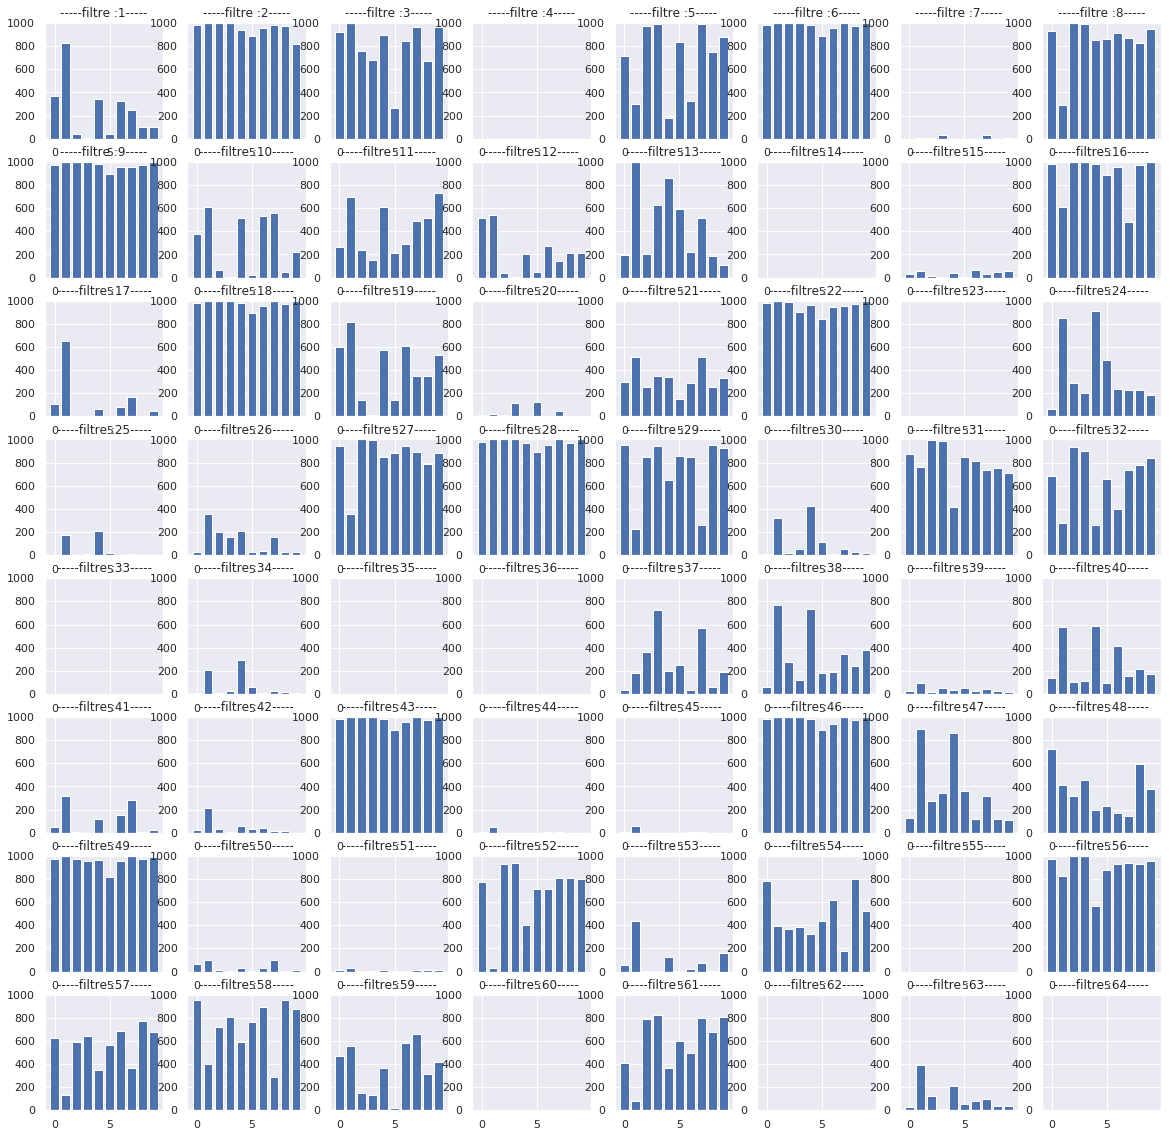

In [33]:
data = Dtest
imgs = Conv2D_2_imgs
nb_neurone = 64
toto = np.zeros((nb_neurone,10))
for label in range(0,10) :
    A = index_active_label_set (data,label,imgs)
    x = collections.Counter(A)
    filtre,apparition = conversion(x)
    for k,i in enumerate (filtre) : 
        toto[i,label]= apparition[k]

list_label =[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(20, 20))
for f in range(0,nb_neurone) :
    ax = plt.subplot(8, 8, f + 1)
    ax.bar(list_label,toto[f,:])
    ax.set_title("-----filtre :"+str(f+1)+"-----")
    ax.set_ylim(0,1000)

plt.show()

### 3. Autre approche de sélection de filtre actifs

In [34]:
def filter_i_all_sample(i,imgs,l):
    # Description de l'algo : prend en paramètre l'indice du filtre que l'on souhaite étudié, l'ensemble des images(sorties de la couche que l'on étudie), et l un seuil qui va nous permettre 
    # de ne garder que un certain ratio des filtres de normes la plus importante. 

    shape = np.shape(imgs)[0] # Nombre d'image
    vect_norm = np.zeros(shape)
    for j in range(shape): # Parcours toutes les images 
        vect_norm[j] = npl.norm(imgs[j,:,:,i])# Calcule la norme du filtre i pour chacune des images. 
        #print(vect_norm[j])
    
    index = np.argsort(vect_norm) #ordonne la norme de chacune des images dans l'ordre croissant , renvoie en sortie les indices des filtres classés dans l'ordre croissant. 
    l = 1. - l
    index_l = int(l*shape) # on cherche l'indice limite tel que l'on garde que  l% des valeurs de normes les plus importants.
    active_index = index[index_l:] # on sélectionne les l% indices des normes les plus grandes (des filtres actifs)
    return active_index



In [35]:
 

# Description algorithme : en paramètre on prend les indices des images pour lesquel le filtre i a été dit activé 
# Cette première fonction permet d'associer à chacun index le label correspondant et compte 
# pour chaque label combien de fois le filtre i a été activé
def index_to_label(active_index,data):
    shape = len(active_index)
    label_set = np.zeros(shape)
    for (k,i) in enumerate (active_index) :
        label_set[k] = data.values[i,-1]
    occurence = collections.Counter(label_set)
    return occurence


#### i. Affichage des résultats pour la première couche Conv2D

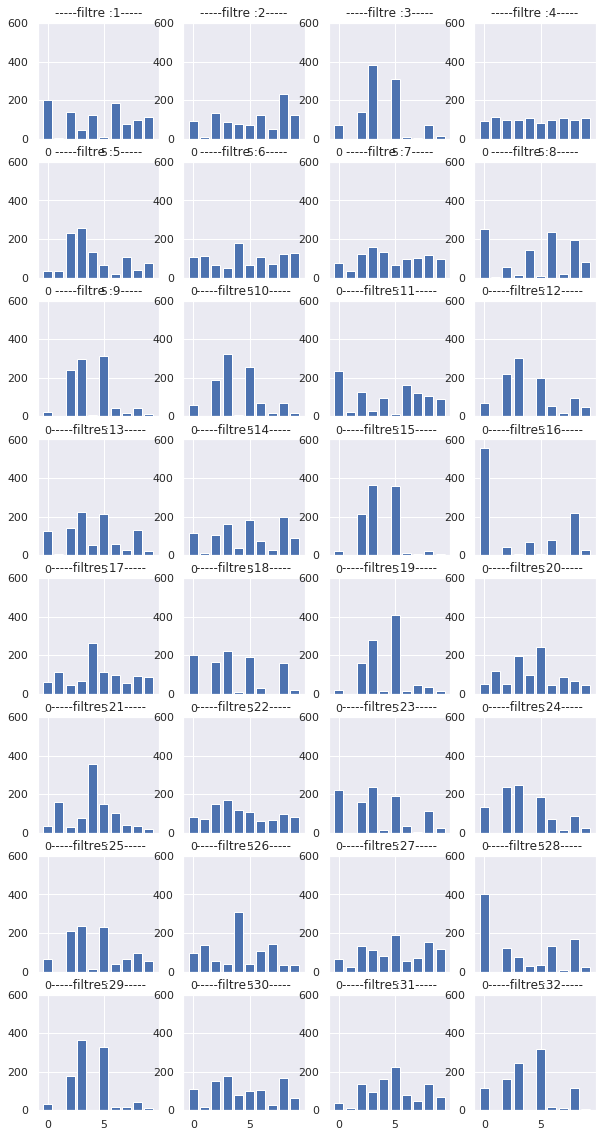

In [37]:
imgs = Conv2D_1_imgs
pourcentage = 0.1
data = Dtest
nb_neuronne= 32
plt.figure(figsize=(10, 20))
for filtre in range(nb_neuronne):
    x = filter_i_all_sample(filtre,imgs,pourcentage)
    o = index_to_label(x,data)
    l,a = conversion(o) #Label et le nombre d'apparition 
    ax = plt.subplot(8, 4, filtre + 1)
    ax.bar(l,a)
    ax.set_ylim(0,600)
    ax.set_title("-----filtre :"+str(filtre+1)+"-----")
plt.show()  


#### ii. Affichage des résultats pour la seconde couche Conv2D

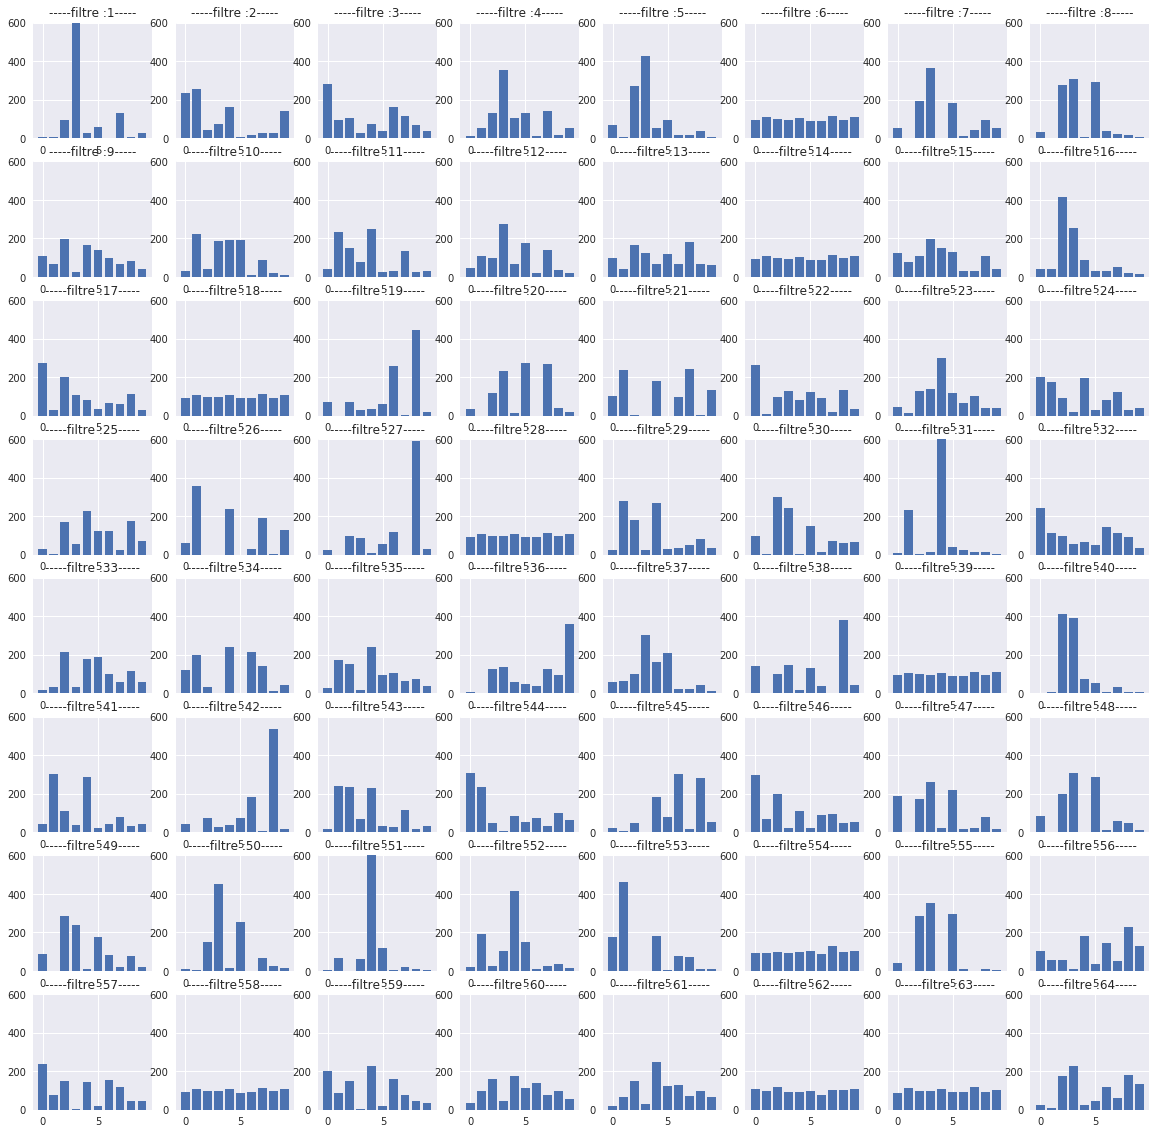

In [36]:
imgs = Conv2D_2_imgs
pourcentage = 0.1
data = Dtest
nb_neuronne= 64
plt.figure(figsize=(20, 20))
for filtre in range(nb_neuronne):
    x = filter_i_all_sample(filtre,imgs,pourcentage)
    o = index_to_label(x,data)
    l,a = conversion(o)
    ax = plt.subplot(8, 8, filtre + 1)
    ax.bar(l,a)
    ax.set_ylim(0,600)
    ax.set_title("-----filtre :"+str(filtre+1)+"-----")
plt.show()  

## III. Déconvolution

Dans cette partie on s'intéréssera particulièrement à la déconvolution de notre première couche de convolution.

In [21]:
from scipy import signal

# Algorithme permettant de calculer la transposé du filtre 
# de la couche de convolution que l'on cherche à déconvoluer. 

def transp (fltr): # fltr correspond à un array de filtre 
    (a,b,c) = np.shape(fltr)
    fltr_transpose = np.zeros((a,b,c))
    for i in range(c) :
        aux = (fltr[:,:,i].T)
        #print(np.shape(aux))
        fltr_transpose[:,:,i] = aux
    return fltr_transpose

In [22]:
fltr = Conv2D_1.get_weights()[0].reshape((3,3,32))
fltr_transpose = transp(fltr)

On développe ici deux algorithmes :

- "deconv_filtre" permet de faire la déconvolution en faisant simplement une convolution utilisant la transposée du filtre. 
- "deconv_filtre_f" permet de faire une déconvolution reposant sur le même principe que précédément mais que pour un filtre donné.

In [23]:
def deconv_filtre (couche,individu ,nb_neurone,fltr_transpose):
    plt.figure(figsize=(20, 20))
    for kernel in range(0,nb_neurone) :
        Y = signal.convolve2d(couche[individu,:,:,kernel], fltr_transpose[:,:,kernel])
        ax = plt.subplot(8, 8, kernel + 1)
        ax.set_title("--deconv_filtre :"+str(kernel)+"--")
        ax.imshow(Y)
#"deconv_filtre" permet de faire la déconvolution en faisant simplement une convolution 
# utilisant la transposée du filtre. 

def deconv_filtre_f (couche,img_l ,nb_neurone,fltr_transpose,f):
    plt.figure(figsize=(20, 20))
    for k,i in enumerate(img_l) :
        Y = signal.convolve2d(couche[i,:,:,f], fltr_transpose[:,:,f])
        ax = plt.subplot(8, 8, k + 1)
        ax.set_title("--deconv_filtre :"+str(f)+"--")
        ax.imshow(Y)
# "deconv_filtre_f" permet de faire une déconvolution reposant sur le même principe que précédément mais que pour 
# un filtre donné

Nous donnons ici un exemple de résultats obtenus par la fonction "deconv_filtre" pour un image donnée. 

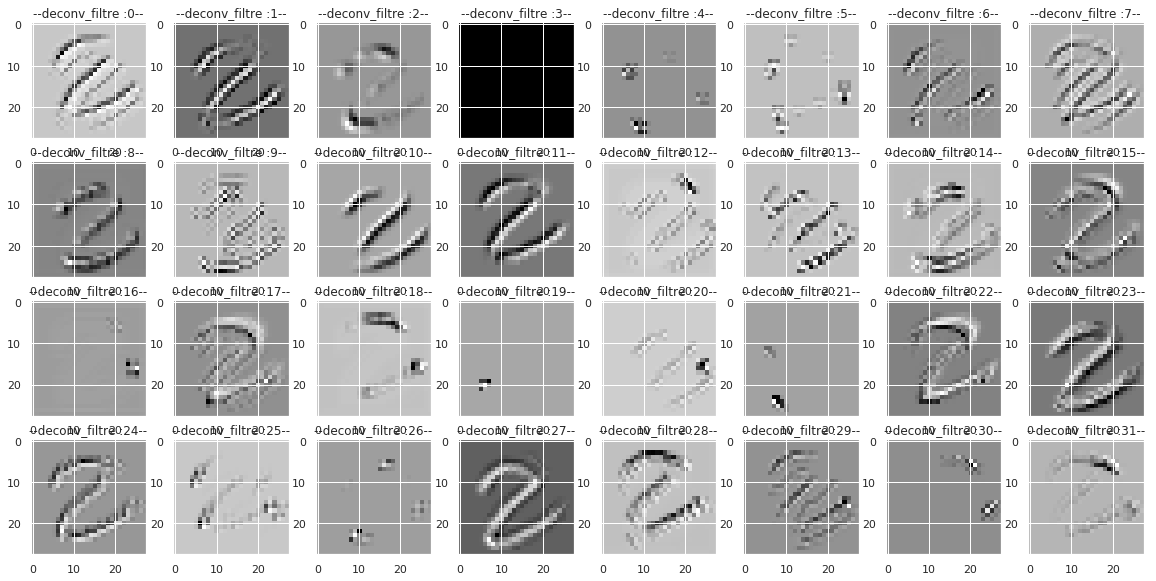

In [90]:
individu = 588
nb_neurone_1 = 32
couche = Conv2D_1_imgs

fltr = Conv2D_1.get_weights()[0].reshape((3,3,32))
fltr_transpose_1 = transp(fltr)

deconv_filtre(couche , individu ,nb_neurone_1,fltr_transpose)

#### Interprétation

Après quelque tests, on se rend compte que certains filtres se sont spécialisés dans la reconnaissance de certaines caractéristiques. 

C'est le cas par exemple des filtres 18 qui arrivent à attraper les lignes horizontales lorsqu'on les applique à des images ayant ces caractéristiques comme des images de 3, de 5 ou encore de 7. 

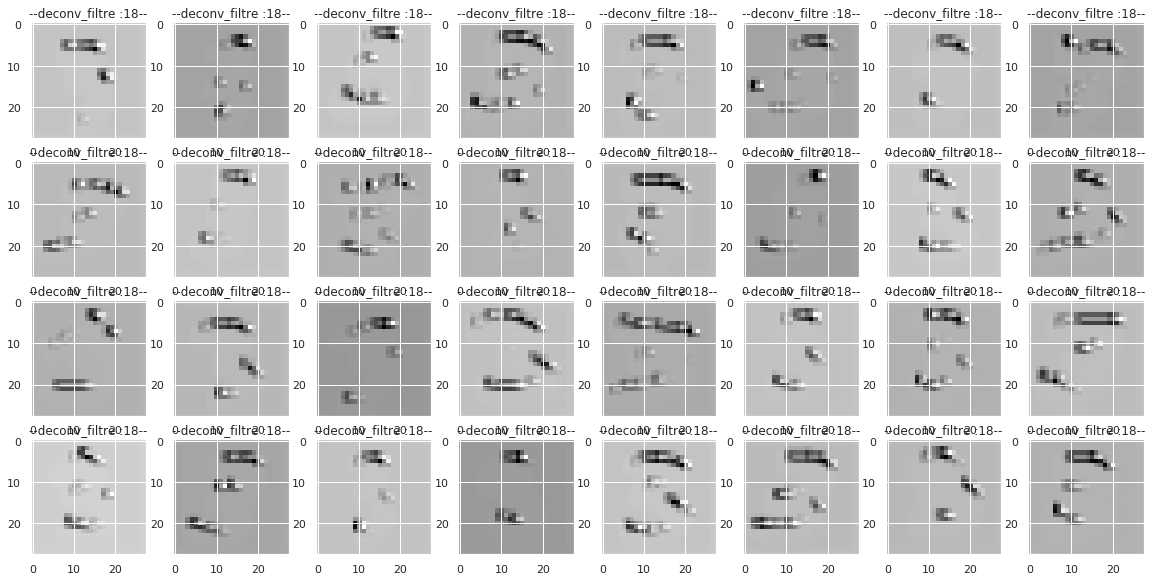

In [64]:
index_3 = Segregation_label_pd(Dtest,3)[1][0:32]
f = 18
deconv_filtre_f (couche,index_3 ,nb_neurone,fltr_transpose,f)

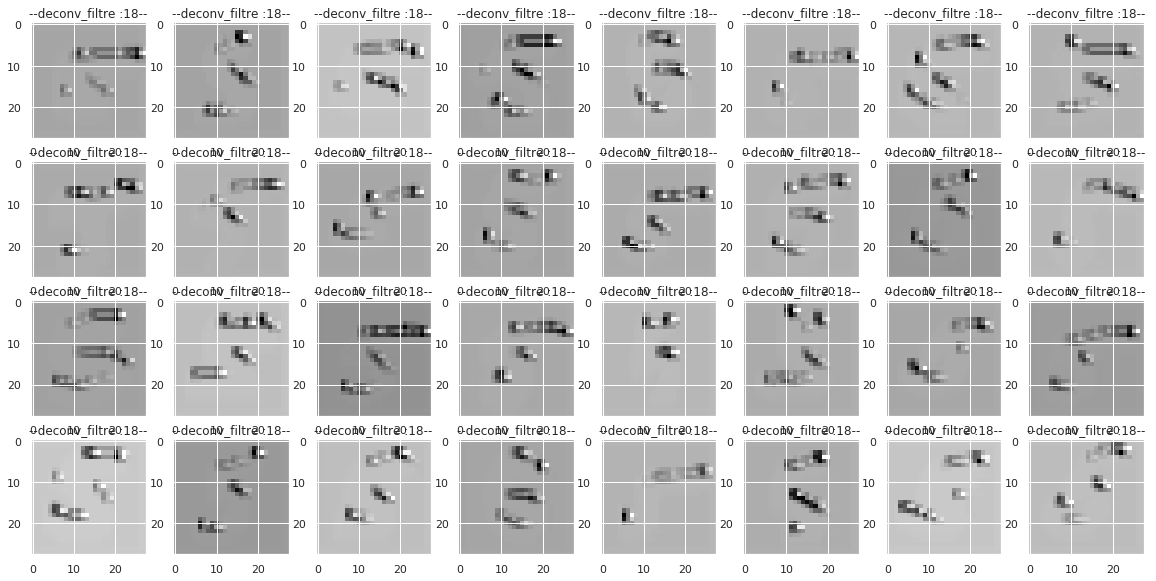

In [94]:
index_5 = Segregation_label_pd(Dtest,5)[1][0:32]
f = 18
deconv_filtre_f (couche,index_5 ,nb_neurone,fltr_transpose,f)

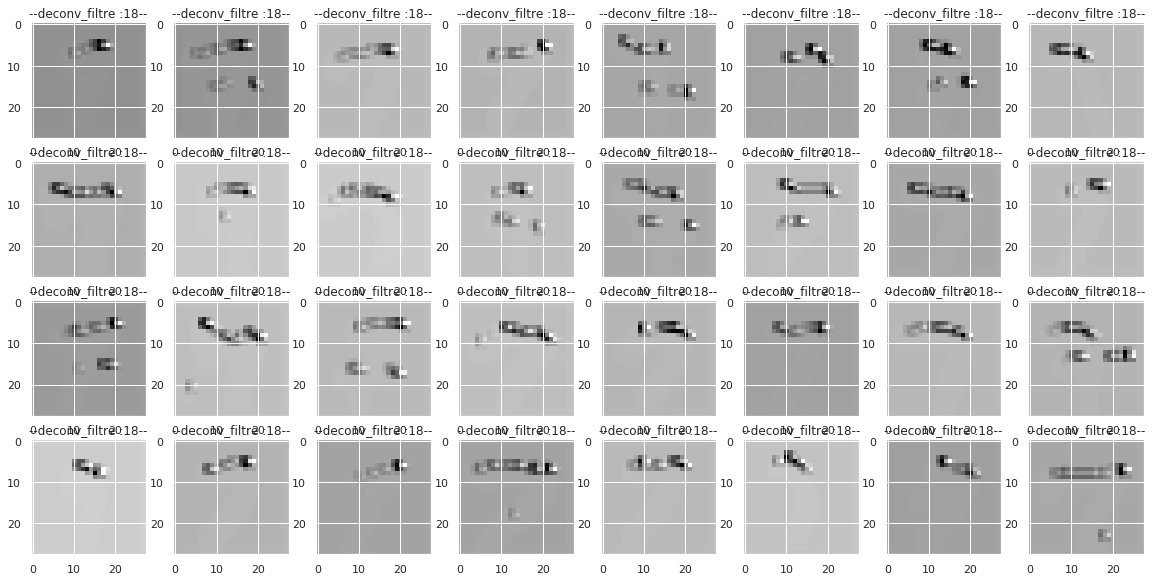

In [99]:
index_7 = Segregation_label_pd(Dtest,7)[1][0:32]
f = 18
deconv_filtre_f (couche,index_7 ,nb_neurone,fltr_transpose,f)

On remarque aussi que les images-réponses au filtre 10, ne contiennent que des lignes obliques. Ceci peut-être observé sur des chiffres tels que 7 et 9.

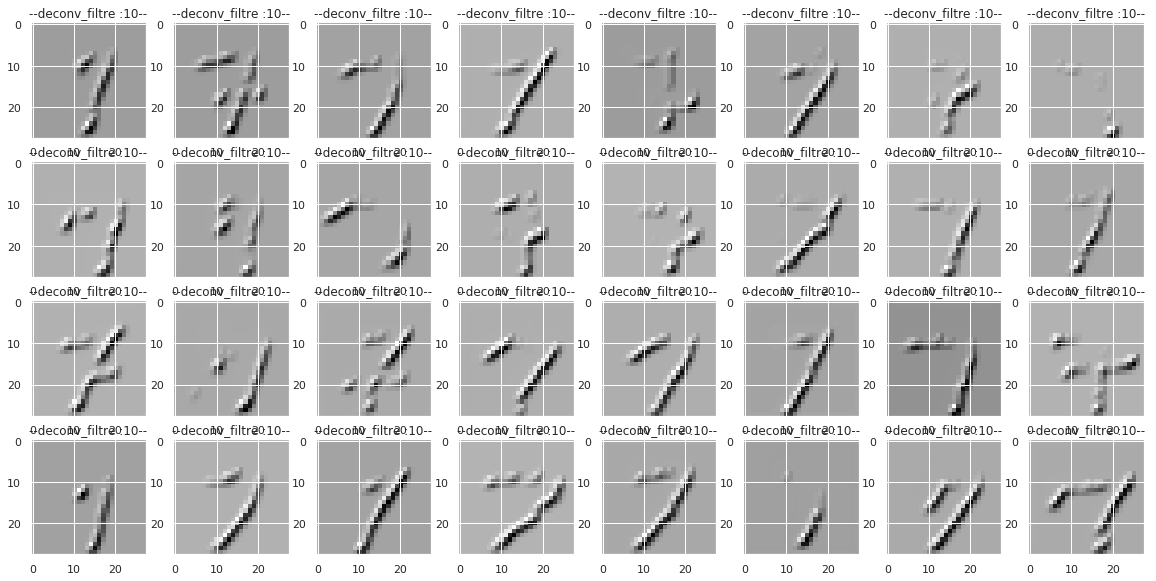

In [100]:
index_7 = Segregation_label_pd(Dtest,7)[1][0:32]
f = 10
deconv_filtre_f (couche,index_7 ,nb_neurone,fltr_transpose,f)

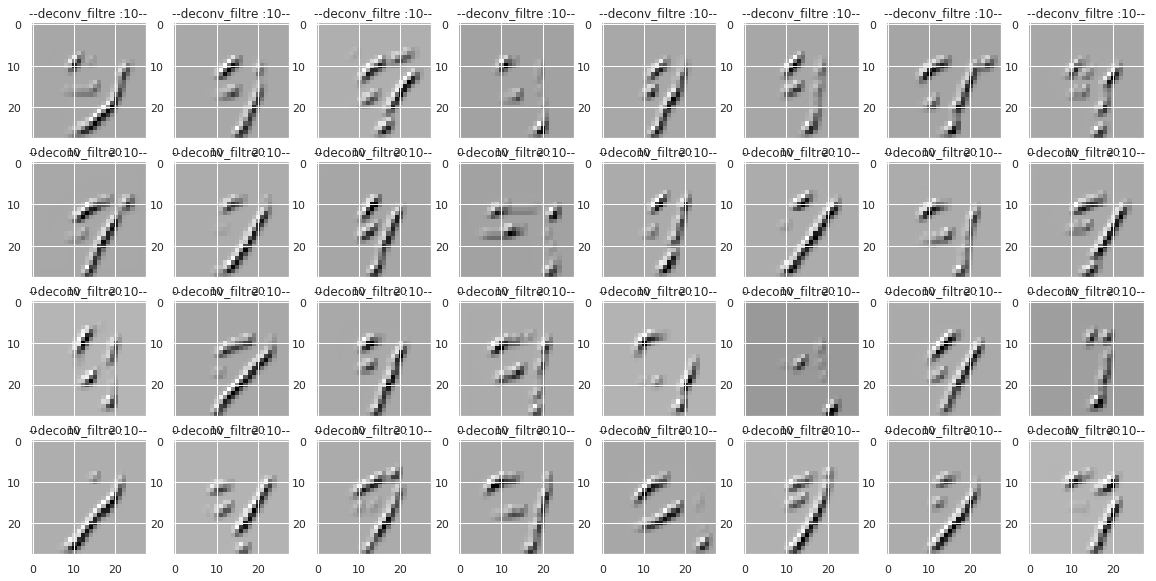

In [101]:
index_9 = Segregation_label_pd(Dtest,9)[1][0:32]
f = 10
deconv_filtre_f (couche,index_7 ,nb_neurone,fltr_transpose,f)

## Deconvolution 2ème couche

Dans cette partie, nous tentons de faire une déconvolution sur notre deuxième couche.

In [ ]:
def conv3D(img,fltr) :
    h,l,c = np.shape(img)
    res = np.zeros((h,l,c))
    for channel in range(c) :
        res[:,:,channel] = signal.convolve2d(img[:,:,channel], fltr[:,:,channel], mode = 'same')
    return res


In [ ]:
# dans cette cellule, je code toutes les fonctions necessaire pour que je puisse avoir le filtre avec lequel je vais appliquer la deconvolution

# transp(fltr) : est une simple fction utilisée precedement qui calcul l ensemble des transposée pour un filtre de taille (3,3,32) , la sortie est de taille (3,3,32)

# fltr_trsp(all_filters) : prend tous les filtre de taille (3,3,32) pour tous les 64 neuronnes, le parametre 'all_filters' est de taile (3,3,32,64) 
# et rend l ensemble des transposees sans selectionner le channel

# selectChannel_trsp_fltr (all_filters,channel) : cette fonction fait la selection et la transposée , elle rend le filtre avec lequel on fera la deconvolution


def transp(fltr): # fltr correspond à un array de filtre 
    (a,b,c) = np.shape(fltr)
    fltr_transpose = np.zeros((a,b,c))
    for i in range(c) :
        aux = (fltr[:,:,i].T)
        #print(np.shape(aux))
        fltr_transpose[:,:,i] = aux
    return fltr_transpose
def fltr_trsp(all_filters) :
    (h,l,c,n) =  np.shape(all_filters) # n est le nombre de neurones
    res = np.zeros((h,l,c,n))
    for i in range(n):
        res[:,:,:,i] = transp (all_filters[:,:,:,i])
    return res
def selectChannel_trsp_fltr (all_filters,channel) :
    (h,l,c,n) =  np.shape(all_filters) 
    aux = fltr_trsp(all_filters)
    (h,l,c,n) = np.shape(aux)
    res = np.zeros((h,l,n))
    res = aux[:,:,channel,:]
    return res

In [ ]:
def deconv_channel (img, all_filters, channel): # cette fontion calcul la deconv
    fltr = selectChannel_trsp_fltr(all_filters,channel)
    res = conv3D(img,fltr)
    return res

In [ ]:
def deconv2_etape1 (img, all_filters) :
    (h,l,c,n) = np.shape(all_filters)
    (x,y,z) = np.shape(img) # z sera = à n
    res = np.zeros((x,y,n,c))
    for i in range(c):
        res[:,:,:,i] = deconv_channel (img, all_filters, i)
    res = np.transpose(res, (0, 1, 3, 2))
    return res

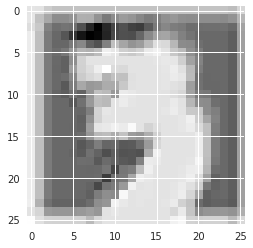

In [25]:
#------------------------ test -----------------------------
all_filters = Conv2D_2.get_weights()[0]
img = Conv2D_2_imgs[0,:,:,:]
toto = deconv2_etape1 (img, all_filters)
np.shape(toto)

def deconv2_etape2 (img, all_filters, fltr1, fltr2) :
    aux = deconv2_etape1(img, all_filters)[:,:,:,fltr2]
    filtre_couche1 = Conv2D_1.get_weights()[0].reshape((3,3,32))[:,:,fltr1]
    res = signal.convolve2d(aux[:,:,fltr1], filtre_couche1)
    return res
individu = 1
fltr1 = 31
fltr2 = 38


all_filters = Conv2D_2.get_weights()[0]
img = Conv2D_2_imgs[individu,:,:,:]
titi = deconv2_etape2 (img, all_filters, fltr1, fltr2)


np.shape(titi)
plt.figure(figsize=(4,4))
plt.imshow(titi)
plt.show()